## Team Virgo Cluster
### Contribution
- Sy Le (006088940) : data import and wrangling, tokenization, remove stopwords, remove stemmings, feature selection using Context of the statement and Party Affiliation
- Mojdeh Keykhanzadeh(008129589) : remove punctuation , apply ngrams,researched about IBM Faireness , Sentiment Analysis of text , Frequency of word visualization ,Topic modeling using Gensim , finding cosine similarity score of title and text 
- Hyunwook Shin (012507417) : Coverage Score and Political Bias/Spectrum Analysis, Data enrichment:
  all news dataset (50K+ articles), political messages dataset (LDA, TF-IDF, MultinomialNB, random forrest, word2vec, doc2vec)
- Lin Cheng (012484459) : Interpret and transform data, use TF-IDF Vectorizer with customized tokenizer + SVD to produce a matrix,  apply different classifiers and hyperparameter tuning
- Yu Xu (012502048): Explored ways to gather topics from the dataset. Explored tf-idf ranking. Explored pipeline + GridSearch for the best n_component of LDA for logistic regression

# Homework: Alternus Vera

Due Tuesday by 11:59pm

Available Oct 30 at 12am - Nov 13 at 11:59pm 15 days

- 1 Read the Article on Fake News (Links to an external site.)Links to an external site. I posted on slack during week 8 lecture. (see 2d below) https://arxiv.org/pdf/1708.01967.pdf
- 2 Project Alternus Vera:
- 2a Use the Kaggle Fake News Data Set,
- 2b Use the "Liar, Liar" DataSet from Politifact.com , that I gave access via Google Drive: https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK (Links to an external site.)Links to an external site.
- 2c Use a data source for enriching your previous project with textual data, such as news, reviews, comments, twitter feeds, etc.
- 2d Define factors in a polynomial equation for factors constituting "Fake News/ Factual News": e.g., Reliable Source, Political Affiliation, Sensationalism, Echo Chamber, (see other factors you can derive from paper 1. above)
- 2e Create 3 classification models that assess at least three of these factors and create corresponding weights for your polynomial equation for coming up with a Fake News score.
- 2f Conduct LDA on the three DataSets above and visualize. Interpret results in a Data Narrative; e.g. what are the topics in those data sets?
- 2g Conduct some form of regression analysis (I will leave this open for discussion and your innovation)

Interpret results in a Data Narrative.

## Examples:
- 2g1 Given news can we predict what a politician will say?
- 2g2 Given a news story, break it into its constituent fake/alternative parts

Diagram for Project: https://drive.google.com/open?id=19Xi4zFMMgiCKiKNiqIj_uE_OYEwWoAxQ (Links to an external site.)Links to an external site.

Alternative View: https://drive.google.com/open?id=10UdEYplQj5UYf0X0l_i9eYHY0xoIy8nv (Links to an external site.)Links to an external site.



In [0]:
# dependencies
import pandas as pd
import nltk

# download nltk stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import pandas as pd
import io
import requests


def get_parsed_data(url):
  return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), sep='\t', header=None)

def get_parsed_data2(url):
  return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), sep=',', header='infer')


columns_politifacts = [
  'id',
  'label',
  'statement',
  'subject',
  'speaker',
  'speakers_job_title',
  'state_info',
  'party_affiliation',
  'barely_true',
  'false',
  'half_true',
  'mostly_true',
  'pants_on_fire',
  'context',
]


# download and parse the dataset...
data_poli_test  = get_parsed_data('https://raw.githubusercontent.com/synle/machine-learning-sample-dataset/master/liar_dataset/test.tsv')
data_poli_train = get_parsed_data('https://raw.githubusercontent.com/synle/machine-learning-sample-dataset/master/liar_dataset/train.tsv')
data_poli_valid = get_parsed_data('https://raw.githubusercontent.com/synle/machine-learning-sample-dataset/master/liar_dataset/valid.tsv')
data_kg_fake_news = get_parsed_data2('https://github.com/synle/machine-learning-sample-dataset/raw/master/liar_dataset/kaggle/kaggle-fake.csv')

# parsed the columns
data_poli_test.columns  = columns_politifacts
data_poli_train.columns = columns_politifacts
data_poli_valid.columns = columns_politifacts

In [0]:
data_poli_test.head()

,id,label,statement,subject,speaker,speakers_job_title,state_info,party_affiliation,barely_true,false,half_true,mostly_true,pants_on_fire,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [0]:
data_kg_fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [0]:
# Loop Helper for data wrangling
def wrangle_text_loop(fun):
  global data_poli_test
  global data_poli_train
  global data_poli_valid
  global data_kg_fake_news
  
  data_poli_test['statement_clean_tokenize'] = data_poli_test['statement_clean_tokenize'].apply(lambda x: fun(x))
  data_poli_train['statement_clean_tokenize'] = data_poli_train['statement_clean_tokenize'].apply(lambda x: fun(x))
  data_poli_valid['statement_clean_tokenize'] = data_poli_valid['statement_clean_tokenize'].apply(lambda x: fun(x))
  data_kg_fake_news['title_clean_tokenize'] = data_kg_fake_news['title_clean_tokenize'].apply(lambda x: fun(x))
  data_kg_fake_news['text_clean_tokenize'] = data_kg_fake_news['text_clean_tokenize'].apply(lambda x: fun(x))
  
# this is the first setup  
data_poli_test['statement_clean_tokenize'] = data_poli_test['statement']
data_poli_train['statement_clean_tokenize'] = data_poli_train['statement']
data_poli_valid['statement_clean_tokenize'] = data_poli_valid['statement']
data_kg_fake_news['title_clean_tokenize'] = data_kg_fake_news['title']
data_kg_fake_news['text_clean_tokenize'] = data_kg_fake_news['text']
  

<h2> Identifying Factors</h2>

| Factor | Rationale | Owner |
| -- | -- | -- | 
| Context  | Type  of the medium (e.g. Large media outlet vs. small blog)  | sy|
| Coverage of topic(s) near date published | Coverage of the latent event from outside sources | hyunwook |
| Political Spectrum | number from 0 to 10 where 0 is left leaning and 10 is right leaning | hyunwook |
| Sensationalism | Ranking from 0 to 10 with 10 being most sensational |  Mojdeh |
|Context Consistency | Ranking from 0 to 10 with 10 being most consistent in the topic and statements| Mojdeh |
| WordToVec raw factors | Numeric vector representation of words in doc texts | Yu |
|Text Raw factors|Raw factors(words) mesured by TF-IDF socre| Lin |

## Tokenize The Strings

In [0]:
# tokenize the word
import re

def tokenize(text):
    tokens = re.split('\W+', str(text).lower())
    return tokens
  
wrangle_text_loop(tokenize)

## Remove stopwords

Remove words that are like `we`, `you`, etc...

In [0]:
from nltk.corpus import stopwords

from string import punctuation
# english_stopwords = stopwords.words('english')
english_stopwords = set(stopwords.words('english') + list(punctuation) + [''])


def remove_stopwords(tokenized_words):
  text = [word for word in tokenized_words if word not in english_stopwords]
  return text


wrangle_text_loop(tokenize)

## Stemming and Lemmatizing
Simplify `meaning`, `meant`, `mean` into the same root word `mean`

In [0]:
import nltk


wn = nltk.WordNetLemmatizer()
def lemmatize(tokenized_words):
  text = [wn.lemmatize(word) for word in tokenized_words]
  return text


ps = nltk.PorterStemmer()
def stemming(tokenized_words):
  text = [ps.stem(word) for word in tokenized_words]
  return text

wrangle_text_loop(stemming)
wrangle_text_loop(lemmatize)

In [0]:
data_poli_test.head()

,id,label,statement,subject,speaker,speakers_job_title,state_info,party_affiliation,barely_true,false,half_true,mostly_true,pants_on_fire,context,statement_clean_tokenize
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,"[, build, a, wall, on, the, u, s, mexico, bord..."
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,"[, wisconsin, is, on, pace, to, doubl, the, nu..."
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,"[, say, john, mccain, ha, done, noth, to, help..."
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,"[, suzann, bonamici, support, a, plan, that, w..."
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,"[, when, ask, by, a, report, whether, he, at, ..."


In [0]:
# why '' still there even if '' should have been removed?
data_poli_test.statement_clean_tokenize[0]

['',
 'build',
 'a',
 'wall',
 'on',
 'the',
 'u',
 's',
 'mexico',
 'border',
 'will',
 'take',
 'liter',
 'year',
 '']

In [0]:
data_poli_test['statement_clean_concat'] = data_poli_test.statement_clean_tokenize.map(lambda x: " ".join(x))


In [0]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', stop_words = english_stopwords, sublinear_tf=True)

In [0]:
# calculate tf_idf for each entry
tf_idf_cleaned_statement = vectorizer.fit_transform(data_poli_test['statement_clean_concat'])

In [0]:
tfidf_scores = []
feature_names = vectorizer.get_feature_names()
for i in range(len(data_poli_test)):
  feature_index = tf_idf_cleaned_statement[i,:].nonzero()[1]
  temp = zip(feature_index, [tf_idf_cleaned_statement[i, x] for x in feature_index])
  tfidf_scores.extend([(feature_names[j], s) for (j, s) in temp])

In [0]:
import operator
tfidf_scores.sort(key=operator.itemgetter(1), reverse=True)

## Now we can see the tf-idf scores for the dataset from high to low. Pick the top 100. This ranking can help us to build fake news scoring models.

In [0]:
tfidf_scores[:100]

[('redistrict', 1.0),
 ('debat', 1.0),
 ('grow', 0.772497278191798),
 ('earmark', 0.7687601047099663),
 ('swing', 0.7529560010431467),
 ('appoint', 0.7426905708880303),
 ('toll', 0.7331823895171675),
 ('offshor', 0.7286239569164302),
 ('core', 0.7188739267100904),
 ('socialist', 0.7128796422439648),
 ('exception', 0.7061378693568888),
 ('bush', 0.7028556892532549),
 ('implement', 0.699925913826752),
 ('know', 0.6957909609698617),
 ('common', 0.6951404732112894),
 ('drill', 0.6849139576672708),
 ('financ', 0.6807599255930651),
 ('road', 0.6800320460845184),
 ('unauthor', 0.6731452286939492),
 ('recess', 0.6696347630716403),
 ('millionair', 0.6693301064630943),
 ('root', 0.6680757056311563),
 ('sue', 0.6679381377770834),
 ('custodi', 0.6672170390364597),
 ('150', 0.6617108264285471),
 ('athlet', 0.6596624707706761),
 ('ethanol', 0.6594352004136094),
 ('frisk', 0.6584164194641098),
 ('pledg', 0.657512950684523),
 ('wind', 0.6569918495570503),
 ('cap', 0.6563506103143171),
 ('nato', 0.6544

## Remove Punctuation 

In [0]:
import string

def remove_punctuation(tokenized_words):
    table = str.maketrans('', '', string.punctuation)
    text = [w.translate(table) for w in tokenized_words]
    return text 
  
wrangle_text_loop(remove_punctuation)


In [0]:
data_poli_test.head()

,id,label,statement,subject,speaker,speakers_job_title,state_info,party_affiliation,barely_true,false,half_true,mostly_true,pants_on_fire,context,statement_clean_tokenize,statement_clean_concat
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,"[, build, a, wall, on, the, u, s, mexico, bord...",build a wall on the u s mexico border will ta...
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,"[, wisconsin, is, on, pace, to, doubl, the, nu...",wisconsin is on pace to doubl the number of l...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,"[, say, john, mccain, ha, done, noth, to, help...",say john mccain ha done noth to help the vet
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,"[, suzann, bonamici, support, a, plan, that, w...",suzann bonamici support a plan that will cut ...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,"[, when, ask, by, a, report, whether, he, at, ...",when ask by a report whether he at the center...


In [0]:
data_kg_fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,title_clean_tokenize,text_clean_tokenize
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,"[, muslim, bust, they, stole, million, in, gov...","[, print, they, should, pay, all, the, back, a..."
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,"[, re, whi, did, attorney, gener, loretta, lyn...","[, whi, did, attorney, gener, loretta, lynch, ..."
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,"[, break, weiner, cooper, with, fbi, on, hilla...","[, red, state, fox, news, sunday, report, thi,..."
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,"[, pin, drop, speech, by, father, of, daughter...","[, email, kayla, mueller, wa, a, prison, and, ..."
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,"[, fantast, trump, s, 7, point, plan, to, refo...","[, email, healthcar, reform, to, make, america..."


## Apply ngrams 

In [0]:
#bigrams 
from nltk import bigrams
from nltk.util import ngrams
def apply_ngrams(tokenized_words):
  rigrams =  list (ngrams(tokenized_words,3))
  return rigrams

apply_ngrams(data_poli_test['statement_clean_concat'] )
#data_poli_test.head()

  


[(' build a wall on the u s mexico border will take liter year ',
  ' wisconsin is on pace to doubl the number of layoff thi year ',
  ' say john mccain ha done noth to help the vet '),
 (' wisconsin is on pace to doubl the number of layoff thi year ',
  ' say john mccain ha done noth to help the vet ',
  ' suzann bonamici support a plan that will cut choic for medicar advantag senior '),
 (' say john mccain ha done noth to help the vet ',
  ' suzann bonamici support a plan that will cut choic for medicar advantag senior ',
  ' when ask by a report whether he at the center of a crimin scheme to violat campaign law gov scott walker nod ye '),
 (' suzann bonamici support a plan that will cut choic for medicar advantag senior ',
  ' when ask by a report whether he at the center of a crimin scheme to violat campaign law gov scott walker nod ye ',
  ' over the past five year the feder govern ha paid out 601 million in retir and disabl benefit to deceas former feder employe '),
 (' when ask 

## TfidfVectorizer/SVD/Logistic Regression

Now try to use TfidfVectorizer to get a matrix for further classification. To make it easier, we make the clssification binary. We also try applying SVD for dimension reduction.

In [0]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
import numpy as np
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from string import punctuation
from nltk import PorterStemmer
import copy 

nltk.download('punkt')

cachedStopWords = set(stopwords.words('english') + list(punctuation) + [''])

print(data_poli_train.groupby(['label'])['label'].count())

data_poli_train_b = copy.deepcopy(data_poli_train);
data_poli_test_b = copy.deepcopy(data_poli_test);
data_poli_train_b.loc[data_poli_train_b['label'].isin(['barely-true','half-true', 'pants-fire']), 'label'] = 'false'
data_poli_train_b.loc[data_poli_train_b['label'].isin(['mostly-true','true']), 'label'] = 'true'
data_poli_test_b.loc[data_poli_test_b['label'].isin(['barely-true','half-true', 'pants-fire']), 'label'] = 'false'
data_poli_test_b.loc[data_poli_test_b['label'].isin(['mostly-true','true']), 'label'] = 'true'

print(data_poli_train_b.groupby(['label'])['label'].count())

def tokenize2(text):

    min_length = 3
    words = map(lambda word: word.lower(), word_tokenize(text))
    words = [word for word in words if word not in cachedStopWords]
    tokens = (list(map(lambda token: PorterStemmer().stem(token), words)))
    p = re.compile('[a-zA-Z]+')
    filtered_tokens = list(filter(lambda token: p.match(token) and len(token) >= min_length, tokens))
    return filtered_tokens

vectorizer = TfidfVectorizer(tokenizer=tokenize2)

svd_model = TruncatedSVD(n_components=200,       
                         algorithm='randomized',
                         n_iter=10)
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
# svd_transformer=vectorizer
    
print((data_poli_train_b["statement"]).shape)

vectorised_train_documents = svd_transformer.fit_transform(data_poli_train_b["statement"])
print (vectorised_train_documents.shape)

train_labels = data_poli_train_b["label"]
print (train_labels.shape)

vectorised_test_documents = svd_transformer.transform(data_poli_test_b["statement"])
test_labels = data_poli_test_b["label"]

print(data_poli_test_b.groupby(['label'])['label'].count())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
label
barely-true    1654
false          1995
half-true      2114
mostly-true    1962
pants-fire      839
true           1676
Name: label, dtype: int64
label
false    6602
true     3638
Name: label, dtype: int64
(10240,)
(10240, 200)
(10240,)
label
false    818
true     449
Name: label, dtype: int64


Then apply LogisticRegression on the TF-IDF output:

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, Imputer, MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

scaler = MaxAbsScaler()
vectorised_train_documents = scaler.fit_transform(vectorised_train_documents)

# model = svm.SVC();
# parameters = {'kernel':('linear','poly','rbf','sigmoid')}
# lr_gridCV = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
# lr_gridCV = lr_gridCV.fit(vectorised_train_documents, train_labels)

# print(lr_gridCV.best_score_)
# print(lr_gridCV.best_params_)
# y_pred = lr_gridCV.predict(vectorised_test_documents)
# print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

logistic = LogisticRegression(class_weight={"false":3,"true":5})
C = [0.01, 0.1, 1, 10]
penalty = ['l1','l2']

param_grid = dict(C=C, penalty=penalty)
gs = GridSearchCV(logistic, param_grid=param_grid, cv= 5, scoring='accuracy')

gs.fit(vectorised_train_documents, train_labels)
print(gs.best_params_)

y_pred=gs.predict(vectorised_test_documents)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print(pd.DataFrame(metrics.confusion_matrix(test_labels, y_pred),
             index=[['actual', 'actual'], ['true', 'false']],
             columns=[['predicted', 'predicted'], ['true', 'false']]))
# print(pd.Series(
#     gs.best_estimator_.coef_.T.ravel(),
#     index=vectorizer.get_feature_names()
# ).sort_values(ascending=False)[:20])


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

{'C': 0.01, 'penalty': 'l1'}
Accuracy: 0.6471981057616417
             predicted      
                  true false
actual true        719    99
       false       348   101


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn.model_selection import train_test_split

print(data_kg_fake_news.shape)
print(data_kg_fake_news.groupby(['type'])['type'].count())

data_kg_fake_news_b=copy.deepcopy(data_kg_fake_news);
data_kg_fake_news_b.loc[data_kg_fake_news_b['type']!='bs', 'type'] = 'non-bs'
X=data_kg_fake_news_b['text']
y=data_kg_fake_news_b['type']

print(data_kg_fake_news_b.groupby(['type'])['type'].count())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

vectorizer = TfidfVectorizer(tokenizer=tokenize2)
svd_model = TruncatedSVD(n_components=200,       
                         algorithm='randomized',
                         n_iter=10)
# svd_transformer = Pipeline([('tfidf', vectorizer), 
#                             ('svd', svd_model)])
svd_transformer=vectorizer
vectorised_train_documents2 = svd_transformer.fit_transform(X_train.astype('U'))
vectorised_test_documents2 = svd_transformer.transform(X_test.astype('U'))


(12999, 22)
type
bias            443
bs            11492
conspiracy      430
fake             19
hate            246
junksci         102
satire          146
state           121
Name: type, dtype: int64
type
bs        11492
non-bs     1507
Name: type, dtype: int64


In [0]:
from sklearn.ensemble import RandomForestClassifier

# logistic = LogisticRegression(class_weight={"bs":1,"non-bs":5})
# C = [0.1, 1]
# penalty = ['l2']

# param_grid = dict(C=C, penalty=penalty)
# gs = GridSearchCV(logistic, param_grid=param_grid, cv= 5, scoring='accuracy')
# gs.fit(vectorised_train_documents2, y_train)

gs=RandomForestClassifier()
gs.fit(vectorised_train_documents2, y_train)
print(vectorised_train_documents2.shape)
feature_imp = pd.Series(gs.feature_importances_,index=list(vectorizer.get_feature_names())).sort_values(ascending=False).nlargest(20)
print(feature_imp)

y_pred=gs.predict(vectorised_test_documents2)
print(y_test.value_counts(sort=False))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(9099, 100198)
nan                  0.025503
naturalnew           0.010055
load                 0.008687
min                  0.005327
via                  0.004801
disqu                0.003689
duke                 0.003376
trump                0.003258
job                  0.003070
utm_medium=widget    0.003017
roundup              0.002812
greenfield           0.002732
liar                 0.002713
republican           0.002692
afp                  0.002673
account              0.002643
neural               0.002539
time                 0.002368
replay               0.002312
jone                 0.002272
dtype: float64
non-bs     458
bs        3442
Name: type, dtype: int64
Accuracy: 0.9005128205128206
[[3430   12]
 [ 376   82]]


In [0]:
data1 = data_kg_fake_news_b.loc[data_kg_fake_news_b['type']=='bs', :]
for col in ['domain_rank','spam_score','replies_count','participants_count', 'likes', 'comments', 'shares', 'type']:
  print(col, ":", data1[col].unique())

domain_rank : [   nan 18533. 78393. 25842.  3734. 94243. 42160. 12993. 48959. 61606.
  6659.  7587. 93026.   967. 22665. 10352. 87365.   486. 23950. 39980.
 36674. 60570. 77628. 22680. 25709.   553. 48175. 35381. 32069. 40299.
 40480. 12387. 70635. 51784. 56000. 78345. 60463. 17592. 67400. 65917.
 82758. 68648. 32398. 79662. 53149. 26413. 30230. 23040. 21114. 68691.
 98679. 54210. 43327. 27046. 23349. 10414. 61423. 91187. 12191. 75353.
 17423. 22432. 44451. 57497. 28149.   538. 31016. 63847. 62759. 22891.
 91245.  1616. 96853. 18896. 91878. 33221. 63072. 56487. 65975. 65060.
  8968. 18369. 93150.  2182. 19375. 42575. 37614.  9645. 14958. 30890.
 84363. 24453. 49688. 23405. 72287. 14170. 51246.  3921. 85288. 34478.
 62087. 48413. 48717. 64783. 58305. 46814. 36845. 14716. 17366. 67959.
 35234. 43665.  2435.]
spam_score : [0.    0.038 0.061 0.018 0.007 0.002 0.009 0.141 0.004 0.001 0.003 0.005
 0.04  0.01  0.995 0.131 0.013 0.928 0.043 0.334 0.008 0.05  0.101 0.028
 0.105 0.71  0.842 0.09

In [0]:
data1.text

59       United States Marine Field McConnell  Plum Cit...
60       So ,you have Rothschild banksters and British ...
61       Here is the problem . The USA constitution sta...
62       There is plenty of proof the machines are rigg...
63       Trump has an excuse now to audit any vote with...
64       He has got to go after him , he is the one cau...
65       He has got to go after him , he is the one cau...
66       There is plenty of proof the machines are rigg...
67       Trump has an excuse now to audit any vote with...
68       He has got to go after him , he is the one cau...
69       United States Marine Field McConnell  Plum Cit...
70       Field is correct about the 8a companies and Tr...
71       Georg Soros the good oil . http://mailstar.net...
72       There is a lot more than meets the eye to this...
73       They tick all the boxes , flying under the rad...
74       Field is correct about the 8a companies and Tr...
75       Georg Soros the good oil . http://mailstar.net.

<h2>Political Spectrum</h2>

<h2>Word2Vec</h2>
(hshin)

Create a word2vector model. This model will be useful identifying the political affiliations of the document. For each non-trivial words (after distiliation), we create a similarity score with the words that are commonly used by authors associated wiht one party or another (such as "tax cuts", "spending" with republican and "bigotry", "impeach" with republicans as an example). It is important to note that the words frequently chosen by one party may not necessarily be something they support. For example, authors to the right of the spectrum do not like spending. Hence,  it is more likely that they would talk about spending than the democrats.

If the document associate closely with the dictionary of words with specific political affiliations you can set the poliyical affiliation score accordingly. The higher the similarity, the greater the weight. 

---



In [0]:
!pip install gensim

In [0]:
from gensim.models import Word2Vec


statements = data_poli_train['statement_clean_tokenize']
statements.head()

0    [, say, the, anni, list, polit, group, support...
1    [, when, did, the, declin, of, coal, start, it...
2    [, hillari, clinton, agre, with, john, mccain,...
3    [, health, care, reform, legisl, is, like, to,...
4    [, the, econom, turnaround, start, at, the, en...
Name: statement_clean_tokenize, dtype: object

In [0]:
m = Word2Vec( statements )

m.similarity( "plan", "cut")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.70238835

In [0]:
m.similarity( "job", "economy" )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


KeyError: ignored

In [0]:
m.similarity( "people", "vote" )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [0]:
# use pipe and gridsearch to find which n_components is the best for LDA and the following logistic regression
pipe = Pipeline([('tfidf', vectorizer), 
                 ('svd', svd_model),
                 ('scaler', scaler),
                 ('logistic', logistic)
                ])

X_train_, y_train_, X_test_, y_test_ = data_poli_train_b["statement"].tolist(),train_labels,data_poli_test_b["statement"].tolist(), test_labels

parameters = {'svd__n_components': [200,500,1000],'logistic__C':C}
grid_tf_idf_ = GridSearchCV(pipe, param_grid=parameters, cv=5, scoring='accuracy')
grid_tf_idf_.fit(X_train_, y_train_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svd__n_components': [200, 500, 1000], 'logistic__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2018-11-16 00:15:48--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-11-16 00:15:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  1.21MB/s    in 15m 59s 

2018-11-16 00:31:47 (878 KB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
import numpy as np

with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
           for line in lines}

In [0]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD

etree_w2v = Pipeline([
    ("word2vec_vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("SVD", TruncatedSVD(n_components = 200)),
    ("random_forest", RandomForestClassifier())])

TypeError: ignored

## Sentiment Analysis 
(Mojdeh)
In this section , we identify and categorize author's opinion which is expressed in the text to find out author's feeling/attitude toward a particular topic . To achieve this , we used vader library to find the polarity score of sentences in each document .

In [0]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#tokenize
data_kg_fake_news ['title_clean_tokenize']=data_kg_fake_news ['title'] .apply(tokenize)
data_kg_fake_news ['text_clean_tokenize'] =data_kg_fake_news ['text'] .apply(tokenize)
#Lemmatize
data_kg_fake_news ['title_clean_tokenize'] = data_kg_fake_news ['title_clean_tokenize'] .apply(lemmatize)
data_kg_fake_news ['text_clean_tokenize'] = data_kg_fake_news ['text_clean_tokenize'] .apply(lemmatize)
#Remove Stopwords
data_kg_fake_news ['title_clean_tokenize'] =  data_kg_fake_news ['title_clean_tokenize'].apply(remove_stopwords)
data_kg_fake_news ['text_clean_tokenize'] =  data_kg_fake_news ['text_clean_tokenize'].apply(remove_stopwords)
#Remove Punctuation
data_kg_fake_news ['title_clean_tokenize'] =  data_kg_fake_news ['title_clean_tokenize'].apply(remove_punctuation)
data_kg_fake_news ['text_clean_tokenize'] =  data_kg_fake_news ['text_clean_tokenize'].apply(remove_punctuation)

In [0]:

data_kg_fake_news['text_clean_concat'] = data_kg_fake_news.text_clean_tokenize.map(lambda x: " ".join(x))
data_kg_fake_news['title_clean_concat'] = data_kg_fake_news.title_clean_tokenize.map(lambda x: " ".join(x))


In [0]:
!pip install vaderSentiment

In [0]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Lets obtain polarity undices for sentences in given topics. First we look at titles and for analysis , I only look at first 10 titlles to reduce computation



In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sid = SentimentIntensityAnalyzer()
sentences_kg = data_kg_fake_news['text_clean_concat']
sentences_kg_title = data_kg_fake_news['title_clean_concat']

def sentiment_analyzer_scores(sentences):
                          
    for sentence in sentences[:10]:
      print(sentence)
      score = sid.polarity_scores(sentence)
      for key in sorted(score):
         print('{0}: {1}, '.format(key, score[key]), end='')
      print()

sentiment_analyzer_scores(sentences_kg_title)

muslim busted stole million gov benefit
compound: 0.4588, neg: 0.0, neu: 0.625, pos: 0.375, 
attorney general loretta lynch plead fifth
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
breaking weiner cooperating fbi hillary email investigation
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
pin drop speech father daughter kidnapped killed isi voted donald j trump 100percentfedup com
compound: -0.765, neg: 0.375, neu: 0.625, pos: 0.0, 
fantastic trump 7 point plan reform healthcare begin bombshell 100percentfedup com
compound: 0.5574, neg: 0.0, neu: 0.714, pos: 0.286, 
hillary go absolutely berserk protester rally video
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
breaking nypd ready make arrest weiner case hillary visited pedophile island least 6 time money laundering underage sex pay play proof inappropriate handling classified information 100percentfedup com
compound: 0.2732, neg: 0.124, neu: 0.717, pos: 0.16, 
wow whistleblower tell chilling story massive voter fraud trump campaign rea

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


as above shows for example , first author is more neutral based on the title. The sum of positive , negative and neutral scrore is equal to one. Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). Now lets apply same analysis on text.

In [0]:
sentiment_analyzer_scores(sentences_kg)

print pay back money plus interest entire family everyone came need deported asap take two year bust go another group stealing government taxpayer group somali stole four million government benefit 10 month reported numerous case like one muslim refugee immigrant commit fraud scamming system way control related
compound: 0.2023, neg: 0.149, neu: 0.671, pos: 0.18, 
attorney general loretta lynch plead fifth barracuda brigade 2016 10 28 print administration blocking congressional probe cash payment iran course need plead 5th either recall refuse answer plain deflects question straight corruption finest 100percentfedup com talk covering loretta lynch plead fifth avoid incriminating payment iran corrupt core attorney general loretta lynch declining comply investigation leading member congress obama administration secret effort send iran 1 7 billion cash earlier year prompting accusation lynch ha pleaded fifth amendment avoid incriminating payment according lawmaker communication exclusivel

In [0]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 20.0MB/s 


## Visualizing 
Lets visualize the most frequent word in the text 

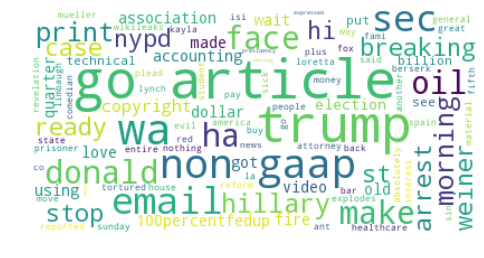

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(sentences_kg))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

** Sentiment analysis 2 **
Lets do sentimnet analyisis in another way (classify sentences according to training set) 

In [0]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
#creating dictionary ,defining 3 classes : positive, negative and neutral
positive_vocab = [ 'wow','awesome', 'outstanding', 'fantastic', 'terrific', 'good',
                  'nice', 'great' ,'Thanks','winner']
negative_vocab = [ 'bad', 'terrible','useless','horrific','hate','fuck']
neutral_vocab = [ 'will','the','say','was','is','did','know','words','not','yes' ]

#using bag of words , convert word  to features 
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

#make train set , the sum of the 3 features
train_set = negative_features + positive_features + neutral_features

#train classifier
classifier = NaiveBayesClassifier.train(train_set)

# Predict
neg = 0
pos = 0
neu = 0


for word in sentences_kg:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
    if classResult == 'neu':
        neu = neu + 1
 
print('Positive: ' + str(float(pos)/len(sentences_kg)))
print('Negative: ' + str(float(neg)/len(sentences_kg)))
print('Neutral: ' + str(float(neu)/len(sentences_kg)))


Positive: 0.9656127394414955
Negative: 0.0343872605585045
Neutral: 0.0


The above score shows more positivity in the text 

##Topic Modeling using Gensim
pick topics based on distribution over words . 


In [0]:
!pip install -U gensim

    100% |████████████████████████████████| 23.6MB 1.2MB/s 
    100% |████████████████████████████████| 1.4MB 13.7MB/s 
    100% |████████████████████████████████| 133kB 27.3MB/s 
    100% |████████████████████████████████| 4.9MB 6.7MB/s 
    100% |████████████████████████████████| 61kB 23.4MB/s 
    100% |████████████████████████████████| 552kB 20.2MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


 First, we are creating a dictionary from the data, then convert to bag-of-words corpus and save the dictionary and corpus for future use.

In [0]:
dictionary = corpora.Dictionary(data_kg_fake_news ['title_clean_tokenize'])
corpus = [dictionary.doc2bow(text) for text in data_kg_fake_news ['title_clean_tokenize']]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [0]:
#finding 5 topics in title 
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.035*"clinton" + 0.031*"hillary" + 0.028*"trump" + 0.013*"fbi"')
(1, '0.042*"nan" + 0.022*"u" + 0.020*"russia" + 0.018*"war"')
(2, '0.012*"de" + 0.009*"la" + 0.005*"11" + 0.005*"le"')
(3, '0.035*"trump" + 0.010*"election" + 0.009*"donald" + 0.009*"president"')
(4, '0.009*"source" + 0.009*"news" + 0.007*"onion" + 0.007*"finest"')


In [0]:
from gensim import corpora
dictionary = corpora.Dictionary(data_kg_fake_news ['text_clean_tokenize'])
corpus = [dictionary.doc2bow(text) for text in data_kg_fake_news ['text_clean_tokenize']]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')


In [0]:
#finding 5 topics in text
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.012*"clinton" + 0.008*"email" + 0.007*"wa" + 0.006*"ha"')
(1, '0.013*"trump" + 0.008*"ha" + 0.007*"people" + 0.007*"clinton"')
(2, '0.015*"wa" + 0.005*"said" + 0.005*"one" + 0.004*"year"')
(3, '0.014*"u" + 0.009*"russia" + 0.009*"war" + 0.008*"wa"')
(4, '0.031*"de" + 0.019*"la" + 0.012*"в" + 0.010*"en"')


Now find the cosine similarity between title and text

In [0]:
import re, math
from collections import Counter

def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
     return Counter(text)

vector1 = text_to_vector(sentences_kg)
vector2 = text_to_vector(sentences_kg_title)

cosine = get_cosine(vector1, vector2)

print('Cosine kaggle (title,text):', cosine)

Cosine kaggle (title,text): 0.2599341150869035


The above score is low but seems rational as title has less words than text

### Context Of A Statement
(Sy)

In this section, we will look at how the context of statement correlate to the reliability of the news

The main reason why *context* is extremely important when it comes to identify the integrity of any statements is that certain medium like a TV ad which are could be fully sponsored by a particular party could potentially distort the integrity of a fact. TV Ads are not reliable because they are paid for to convey a message that potentially be beneficial to their sponsors. In this context, we should proceed with cautions.


In [0]:
data_to_use_for_training = data_poli_train

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords


ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
english_stopwords = stopwords.words('english')

def split_text_into_tokens(text):
  tokens = re.split('\W+', text)
  return tokens


def clean_text_for_string(text):
  text = str(text)
  text = "".join([word.lower() for word in text])
  tokens = split_text_into_tokens(text)
#   Use Stemming
#   tokens = [ps.stem(word) for word in tokens if word not in english_stopwords]

#   Use Lemmatization
  lemmatize = [wn.lemmatize(word) for word in tokens if word not in english_stopwords]
  return " ".join(tokens).strip()


def routine_do_clean_context(current_df):
  # clean up text
  current_df['cleaned_context'] = current_df['context'].apply(clean_text_for_string)
  current_df['cleaned_statement'] = current_df['statement'].apply(clean_text_for_string)
  current_df['cleaned_party_affiliation'] = current_df['party_affiliation'].apply(clean_text_for_string)
  
  
routine_do_clean_context(data_to_use_for_training)

In [0]:
# show output of the cleanup with the above lemmatization and cleanup
idx_to_print = 200
data_to_use_for_training['context'][idx_to_print], data_to_use_for_training['cleaned_context'][idx_to_print]

('a column published on NJ.com', 'a column published on nj com')

### Understanding the distribution of context and label

Here let's look at how the context relates to label and visualize the top context keyword. Below are how I construct the score of fake vs non fake

Given a label, and how each are score
- true: 1
- false: 0
- half-true: -1
- pants-fire: 0.2
- barely-true: 0.6
- mostly-true: 0.8

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


def plot_dictionary_bar_chart(D, plot_title, constraint_min = -5, constraing_max = 40):
  # only plot the big keys...
  D = {k:v for (k,v) in D.items() if v > constraing_max or v < constraint_min}
  
  # make plot bigger
  figure(num=None, figsize=(25, 6), dpi=80, facecolor='w', edgecolor='k')
  
  # plot title
  plt.suptitle(plot_title, fontsize=16)

  
  # plot
  plt.bar(range(len(D)), list(D.values()), align='center')
  plt.xticks(range(len(D)), list(D.keys()))
  plt.show()


def get_label_score_from_string(current_label):
  if current_label == 'true':
    return 1
  if current_label == 'false':
    return 0
  if current_label == 'half-true':
    return 0.5
  if current_label == 'pants-fire':
    return -1
  if current_label == 'barely-true':
    return 0.6
  if current_label == 'mostly-true':
    return 0.8
  return 0


def get_stats_for_context_from_data_frame(current_df):
  stats_context_general_score = {}
  stats_context_agg_score = {}
  
  for current_row_tuple in current_df.iterrows():
    current_row = current_row_tuple[1]
    current_row_label = current_row['label']
    topic_context = current_row['cleaned_context']

    if topic_context not in stats_context_general_score.keys():
      stats_context_general_score[topic_context] = {
        'true': 0,
        'false': 0,
        'half-true': 0,
        'pants-fire': 0,
        'barely-true': 0,
        'mostly-true': 0
      }

    stats_context_general_score[topic_context][current_row_label] = stats_context_general_score[topic_context][current_row_label] + 1

    if topic_context not in stats_context_agg_score.keys():
      stats_context_agg_score[topic_context] = 0

    stats_context_agg_score[topic_context] = get_label_score_from_string(current_row_label) + stats_context_agg_score[topic_context]

  #
  return stats_context_general_score, stats_context_agg_score

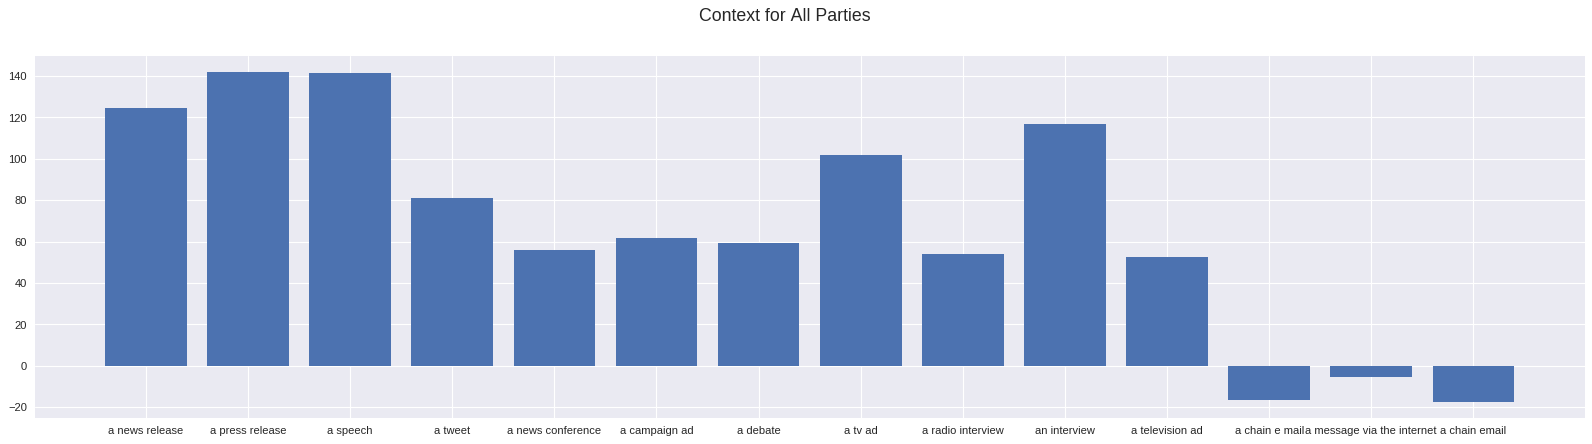

In [0]:
stats_context_general_score, stats_context_agg_score = get_stats_for_context_from_data_frame(data_to_use_for_training)
plot_dictionary_bar_chart(stats_context_agg_score, 'Context for All Parties')


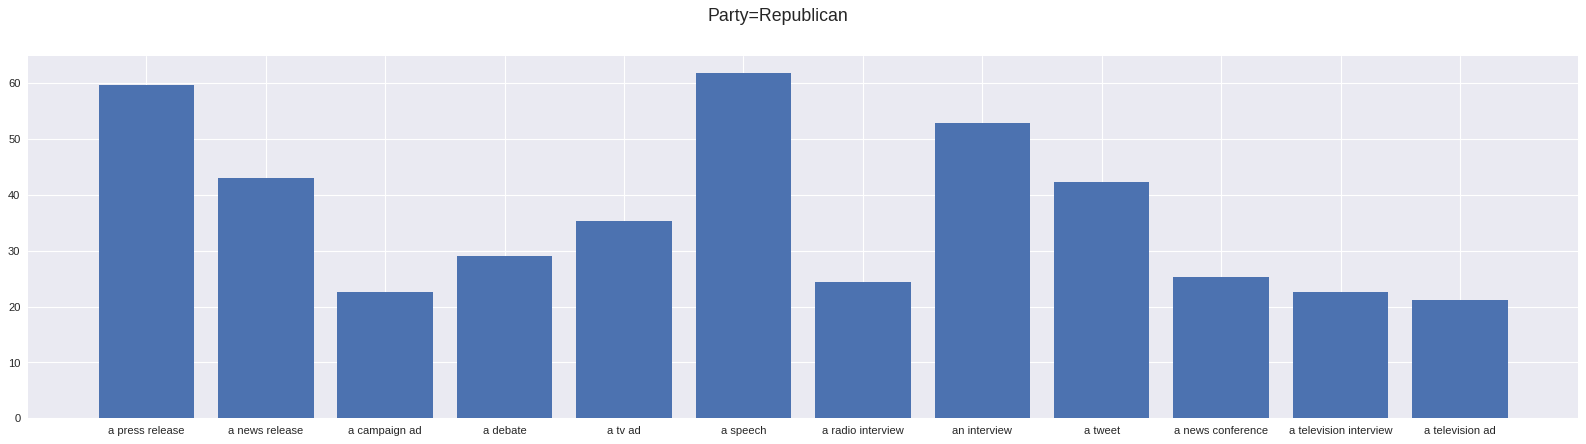

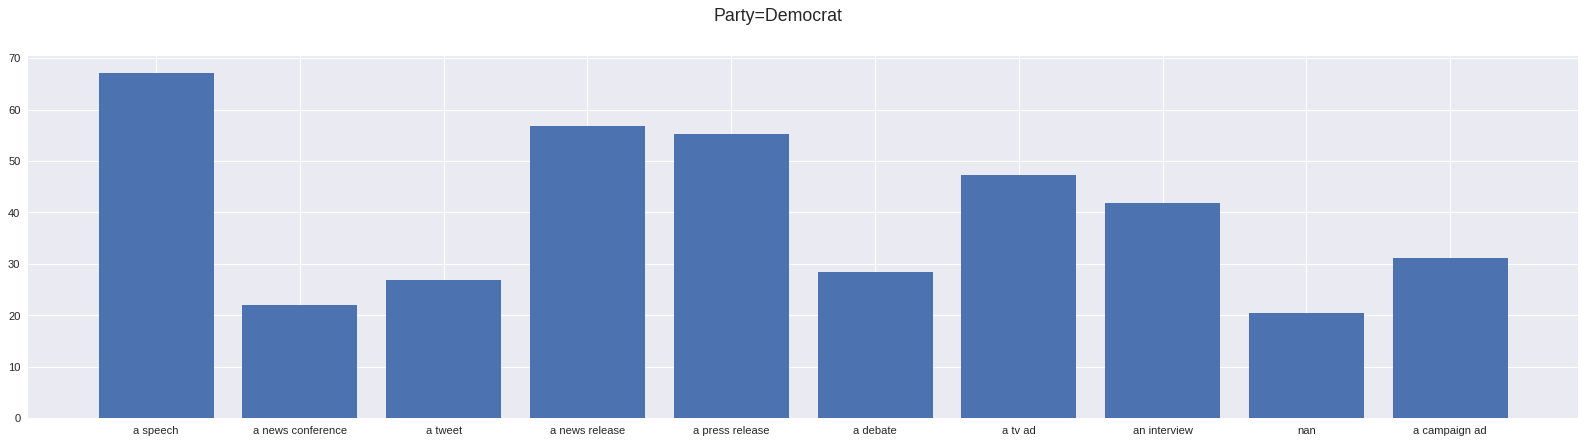

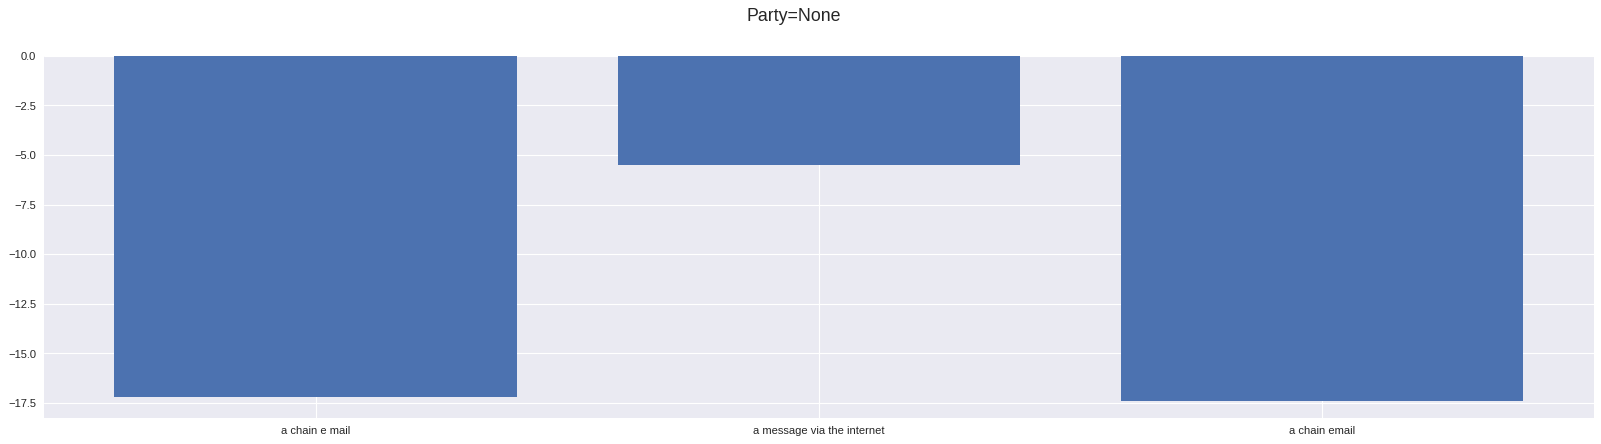

In [0]:
stats_context_general_score_republican, stats_context_agg_score_republican = get_stats_for_context_from_data_frame(data_to_use_for_training[data_to_use_for_training['party_affiliation'] == 'republican'])
plot_dictionary_bar_chart(stats_context_agg_score_republican, 'Party=Republican', -3, 20)
stats_context_general_score_democrat, stats_context_agg_score_democrat = get_stats_for_context_from_data_frame(data_to_use_for_training[data_to_use_for_training['party_affiliation'] == 'democrat'])
plot_dictionary_bar_chart(stats_context_agg_score_democrat, 'Party=Democrat', -3, 20)
stats_context_general_score_none, stats_context_agg_score_none = get_stats_for_context_from_data_frame(data_to_use_for_training[data_to_use_for_training['party_affiliation'] == 'none'])
plot_dictionary_bar_chart(stats_context_agg_score_none, 'Party=None', -3, 20)

### Basic conclusion from the above context analysis...

As we can see, `a chain email` or `a message from the internet` tends to have an extremely low score and likely to be concluded as fake news.

On the other hand, `a press release` and `a speech` tend to provide a better integrity and authenticity of the news.

## Event Coverage (Hyunwook Shin)

### Please use the link below for code execution:
### https://colab.research.google.com/drive/1gOvKRrE7g7ldiNIpoYbkx3hnOW9LT66T#scrollTo=demxO78luMuk

The main motivation behind **event coverage** is the hypothesis that there is a positive corelation between outside coverage of the latents event depicted in the article and the creditbility and ultimately truthfulness of the article as a whole.  In other words, the more news sources (outside the article) talk about the same event, the more credible the article is as a whole. Some fake news are designed to confuse audiences and make them lose trust in reliable news (Shu et al, 2017). 

We as readers do this from day to day when we read sensational or eye-catching articles. When we read an article about a topic we think is "too good to be true", we cross-check with other news websites under Google News or Twitter to read up on the event or topic. This is backed by the idea that there are fake users and bot account purposely desigend to spread false stories (Shu et al., 2017).  **Through tips and advice on slack, just because there are ample number of coverage on some topic, it does not necessarily mean that the particular article in question is a reliable (non-fake news).** (Arsanjani, 2018). This factor should be used in conjunction with other factors such as "bias", "sensationalism", and "social media activites" to further reduce the impurity of the classifications. We can treat this factor as an intermediary step to be factored early in the process to remove True Positives.


We shall define the  following terms as follows:

* **coverage**  - number of news from media outlet that covered the same event or latent topic depicted in the article, within a fixed time window. There is a fixed window of time 1 month (coverage 30) and 2 months (coverage 60) before and after the article was published.


### Method

 * **Coverage** We first use topic modeling to find the key latent topics. Then we use a separate dataset called "All the news" dataset to see if there are other  articles covering a similar event. It is important to note that we are *not* cross-checking factual claims made in the article, but rather checking to see if a related and latent topic can be found in other news sources. If there are no external coverage for the event/topic, chances are that the article in question is likely a fake news. However, just because there are sufficient coverage during the time frame, it does not necessarily mean that the news is completely reliable.
  

### Data Enrichment

We have use two main datasets to be used for data enrichment:

<b>Dataset 1</b> - All The News (Thompson, 2017)
- Original: https://www.kaggle.com/snapcrack/all-the-news
- Copy: https://github.com/h7shin/all_news_dataset_kaggle

The above data is useful for analyzing coverage report of non-fake news articles
curated from mainstream news media sites.

### Downloading the Dataset

In [0]:

import pandas as pd
import nltk
import io
import requests
import re

# download nltk stopwords
nltk.download('stopwords')
nltk.download('wordnet')

def get_parsed_data(url, sep='\t', header=None ):
  return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), sep=sep, header=header )

# Download and parse the dataset... Let us first work with 100 articles
KAGGLE_DATASET = 'https://github.com/synle/machine-learning-sample-dataset/raw/master/liar_dataset/kaggle'
data_kaggle = get_parsed_data('%s/kaggle-fake.csv'% KAGGLE_DATASET, ',' , 'infer' )[:1000]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Distillation

We run tokenization, remove stop words and run lemmatization to cleanse the text.

In [0]:
data_kaggle['text_distilled'] = data_kaggle['title'].apply(lambda x : re.split('\W+', str(x).lower())) +\
   data_kaggle['text'].apply(lambda x : re.split('\W+', str(x).lower()))
data_kaggle.head(1)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_distilled
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,"[muslims, busted, they, stole, millions, in, g..."


In [0]:
def lemmatize(tokenized_words):
  text = [nltk.WordNetLemmatizer().lemmatize(word) for word in tokenized_words]
  return text

data_kaggle['text_distilled_lemma'] = data_kaggle['text_distilled'].apply(lemmatize)
data_kaggle.text_distilled[0][:15]

['muslims',
 'busted',
 'they',
 'stole',
 'millions',
 'in',
 'gov',
 't',
 'benefits',
 'print',
 'they',
 'should',
 'pay',
 'all',
 'the']

### Removing Stop words

In [0]:
from nltk.corpus import stopwords
from string import punctuation

english_stopwords = set(stopwords.words('english') + list(punctuation) + [''])

def remove_stopwords(tokenized_words):
  text = [word for word in tokenized_words if word not in english_stopwords]
  return text

data_kaggle['text_distilled'] = data_kaggle['text_distilled'].apply(remove_stopwords)
data_kaggle.text_distilled[0][:15]

['muslims',
 'busted',
 'stole',
 'millions',
 'gov',
 'benefits',
 'print',
 'pay',
 'back',
 'money',
 'plus',
 'interest',
 'entire',
 'family',
 'everyone']

We also remove two letter words, with exceptiuons

In [0]:
whitelist = set(['ai', 'ax', 'ca', 'eu', 'go', 'io', 'la', 'ox', 'us', 'uk', 
                 'al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'hi', 
                 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi',
                 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny',
                 'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn',
                 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy' ])
def remove_too_short(tokenized_words):
  text = [word for word in tokenized_words if (len(word) >= 3 or word not in whitelist) ]
  return text


In [0]:
data_kaggle['text_distilled'] = data_kaggle['text_distilled'].apply(remove_too_short)
data_kaggle.text_distilled[0][:15]

['muslims',
 'busted',
 'stole',
 'millions',
 'gov',
 'benefits',
 'print',
 'pay',
 'back',
 'money',
 'plus',
 'interest',
 'entire',
 'family',
 'everyone']

### LDA analysis

In [0]:
! pip install gensim

    100% |████████████████████████████████| 23.6MB 1.2MB/s 
    100% |████████████████████████████████| 1.4MB 14.9MB/s 
    100% |████████████████████████████████| 133kB 19.4MB/s 
    100% |████████████████████████████████| 5.1MB 6.0MB/s 
    100% |████████████████████████████████| 61kB 23.0MB/s 
    100% |████████████████████████████████| 552kB 25.4MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


We will use topic modelling (LDA) to identify the key topics, 
https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21


In [0]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

def topics(tokenized_words):
    d = Dictionary([tokenized_words])
    c = [d.doc2bow(tokenized_words)]
    m = LdaModel(c, num_topics=1, id2word=d)
    return list(m.print_topics(num_words=2))
  
data_kaggle['topics'] = data_kaggle['text_distilled'].apply(topics)

### Topics as Simple List of Words

A list of topic terms is compiled as show below. The coefficients in front of each word are dropped as part of simplification. The assumption is that the top two words comprising the topic, are both significant enough to be treated equally. It is important that the goal is to build a reliable prediction model. While there is a risk of oversimplification, if the final model results in a poor accuracy score, the coefficient can always be reintroduced here.

### 7.1 Data Enrichment

The notebook uses Kaggle's "All the news" dataset to curate reference articles to enrich the study of coverage analysis  (Thompson,  2017).

<img src="https://images.pexels.com/photos/261949/pexels-photo-261949.jpeg?cs=srgb&dl=administration-articles-bank-261949.jpg&fm=jpg" width=400px>

The relevant dataset files are downloaded from Kaggle, unzipped and re-uploaded to GitHub repository (Thompson,  2017).

https://www.kaggle.com/snapcrack/all-the-news/home

In [0]:
# All News Kaggle

def get_parsed_data(url, sep='\t', header=None ):
  return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), sep=sep, header=header )

KAGGLE_ALL_DATASET = 'https://github.com/h7shin/all_news_dataset_kaggle/blob/master/%s?raw=true'
all_kaggle_1 = get_parsed_data(KAGGLE_ALL_DATASET % 'articles1.csv' , ',' , 'infer' )
#all_kaggle_2 = get_parsed_data(KAGGLE_ALL_DATASET % 'articles2.csv' , ',' , 'infer' )
#all_kaggle_3 = get_parsed_data(KAGGLE_ALL_DATASET % 'articles3.csv' , ',' , 'infer' )

Verifying that the above dataset is downloaded successfully, `all_data_kaggle_1.head()` was called.

In [0]:
all_kaggle = all_kaggle_1 

### Distillation of All News Dataset

In [0]:
all_kaggle['text_distilled'] = all_kaggle['title'].apply(lambda x : re.split('\W+', str(x).lower())) +\
   all_kaggle['content'].apply(lambda x : re.split('\W+', str(x).lower()))

In [0]:
all_kaggle['text_distilled'] = all_kaggle['text_distilled'].apply(lemmatize)

In [0]:
all_kaggle['text_distilled'] = all_kaggle['text_distilled'].apply(remove_stopwords)

In [0]:
all_kaggle['text_distilled'] = all_kaggle['text_distilled'].apply(remove_too_short)
all_kaggle.text_distilled[0][:15]

['house',
 'republican',
 'fret',
 'winning',
 'health',
 'care',
 'suit',
 'new',
 'york',
 'time',
 'washington',
 'congressional',
 'republican',
 'new',
 'fear']

### Running LDA to Extract Topics

In [0]:
def topics(tokenized_words):
    d = Dictionary([tokenized_words])
    c = [d.doc2bow(tokenized_words)]
    m = LdaModel(c, num_topics=1, id2word=d)
    return list(m.print_topics(num_words=2))
  
data_kaggle['topics'] = data_kaggle['text_distilled'].apply(topics)

In [0]:
def parseTopics(topics):
   output = []
   words = topics[0][1].split( '+' )
   for word in words:
       output.append( word.split('*')[1].replace( '"', '' ) )
   if len( output ) < 2:
      output.append( output[0] )
   if len( output ) != 2:
      print( output )
      assert len(output) == 2
   if not isinstance( output[0], str ) or not isinstance( output[1], str ):
      print( output )
      assert isinstance( output[0], str )
      assert isinstance( output[1], str )
    
   #if not isinstance( output[1], str ):
   #   print( output )
   #   assert isinstance( output[1], str )
   return output

In [0]:
all_kaggle['topics'] = all_kaggle['text_distilled'].apply(topics)
all_kaggle['topics'] = all_kaggle['topics'].apply(parseTopics)
all_kaggle.title[0], all_kaggle.topics[0]

('House Republicans Fret About Winning Their Health Care Suit - The New York Times',
 ['house ', 'republican'])

In [0]:
all_kaggle.topics[1]

['precinct ', 'said']

In [0]:
all_kaggle.topics[2]

['wong ', 'mr']

### Scoring Coverage

In [0]:
def setDate( published ):
   return published.split( "T" )[0]

data_kaggle[ 'date' ] = data_kaggle.published.apply( setDate )

The coverage window is simply a time-range where two articles are considered to be pushed in the same approximate "time frame". Narrowing the window size will result in low coverage score across all rows. Increasing the window size will result in high coverage score across all rows. The choice of the window size was arbitrary (30 days). Please see section 7.17 for 60-day coverage window.

In [0]:
import datetime

def window( datestring, n ):
   d = datetime.datetime.strptime( datestring, "%Y-%m-%d" )
   delta = datetime.timedelta(days=n)
   fromdate = datetime.datetime.strftime(d - delta, "%Y-%m-%d")
   todate = datetime.datetime.strftime(d + delta, "%Y-%m-%d")
   return ( fromdate, todate )

In [0]:
import datetime

print( "Start Time", datetime.datetime.now() )

def coverage( article ):
   fromdate, todate = window( article[ 'date' ], 15 )
   selected_coverage = all_kaggle[(all_kaggle['date'] > fromdate) & (all_kaggle['date'] < todate)]
   selected_coverage['covered'] = selected_coverage.apply( lambda r: r[ 'topics' ][0] in article.topics and
                                                       r[ 'topics' ][1] in article.topics, axis=1 )
   return len(selected_coverage[selected_coverage['covered'] == True])

data_kaggle[ 'coverage' ] = data_kaggle.apply( coverage, axis=1 )

print( "Finished Time", datetime.datetime.now() )

Start Time 2018-12-05 03:11:59.545539


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Finished Time 2018-12-05 03:28:21.182287


In [0]:
data_kaggle.sort_values(by=['coverage'], ascending=False ).head(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,shares,type,text_distilled,text_distilled_lemma,topics,date,coverage,topic_0,topic_1,date_int
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,0,bias,"[muslims, busted, stole, millions, gov, benefi...","[muslim, busted, they, stole, million, in, gov...","[(0, 0.030*""benefits"" + 0.030*""government"")]",2016-10-26,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",201610
671,9cf9163fcb8564e3e3e51f13b7dc78a1eeb60445,0,Alex Ansary,2016-11-03T21:04:03.190+02:00,"Protesters, Police Still Clashing Over Dispute...","Protesters, Police Still Clashing Over Dispute...",english,2016-11-03T21:04:03.190+02:00,amtvmedia.com,US,...,0,bs,"[protesters, police, still, clashing, disputed...","[protester, police, still, clashing, over, dis...","[(0, 0.024*""protesters"" + 0.020*""pipeline"")]",2016-11-03,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",201611
658,e5c051173c7efd9a46dc2449146c544e20f931ba,0,Alex Ansary,2016-11-02T19:14:58.593+02:00,"Bundy brothers discharged from Oregon jail, he...","Bundy brothers discharged from Oregon jail, he...",english,2016-11-02T19:14:58.593+02:00,amtvmedia.com,US,...,0,bs,"[bundy, brothers, discharged, oregon, jail, he...","[bundy, brother, discharged, from, oregon, jai...","[(0, 0.038*""federal"" + 0.033*""bundy"")]",2016-11-02,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",201611
659,0c9d01b2bc7e6e5be2ebecd52b54468b5bf1e731,0,Alex Ansary,2016-11-02T19:24:00.901+02:00,Warning or threat? Hillary hints at second civ...,Warning or threat? Hillary hints at second civ...,english,2016-11-02T19:24:00.901+02:00,amtvmedia.com,US,...,0,bs,"[warning, threat, hillary, hints, second, civi...","[warning, or, threat, hillary, hint, at, secon...","[(0, 0.022*""clinton"" + 0.022*""trump"")]",2016-11-02,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",201611
660,705bbad66afa88a8b0c0c8854d107be3a4369bad,0,Alex Ansary,2016-11-02T19:24:01.278+02:00,U.S. militia girds for trouble as presidential...,U.S. militia girds for trouble as presidential...,english,2016-11-02T19:24:01.278+02:00,amtvmedia.com,US,...,0,bs,"[u, militia, girds, trouble, presidential, ele...","[u, s, militia, girds, for, trouble, a, presid...","[(0, 0.010*""members"" + 0.010*""said"")]",2016-11-02,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",201611


In [0]:
data_kaggle.sort_values(by=['coverage'], ascending=False ).head(1)['title'], data_kaggle.sort_values(by=['coverage'], ascending=False ).head(1)['coverage']

(0    Muslims BUSTED: They Stole Millions In Gov’t B...
 Name: title, dtype: object, 0    0
 Name: coverage, dtype: int64)

### Intermediary Analysis

**Label Pairing** - For now,  top two words of the topics are chosen in the all-news dataset, as "labels." Then using the topics of each fake news datasets and number all-news articles corresponding to each fake news article can be deduced. This means that for every article, we are searching for related articles. 

<i>Hypothetical Label Pairing for Illustration Purposes</i>

Table A (10 articles)

|  Articles | Topic Words | Computed Coverage Score | Rationale |
| -- | -- | -- |
|  1            | "Apple", "Banana" | 0 | Matches None from B |
|  2            | "Apple", "Orange" | 1 |  Matches B.2 |
|  3            | "Orange", "Pear" | 2 | Matches B.3 and B.1023 | 
| ... | ... |

Table B (10,000 articles)

|  Articles | Topic Words |
| -- | -- |
|  1            | "Apple", "Pear" |
|  2            | "Apple", "Orange" |
|  3            | "Orange", "Pear" |
| ... | ... |
|  1023      | "Orange", "Pear" |
| ... | ... | 

**Building a Model** This "search" part should only be done during training stage, but not during testing and validation stages. But manually searching each row in the database is expensive and unscalable. Also, if the model simply looks up in internal database and return the score, it is more or less a search solution, not a Machine Learning Classification solution.

Instead of doing this search for every article, the model should predict how much coverage it is likely to have based on the top two **topic terms** and the **date** of publication with classifiers such as Naive Bayes or Decision Trees. Clearly it will require lot of articles for training since there will be a rich set of topic terms and dates resulting in wide range of coverage scores.

**Risks** There is some risk involved with this approach. Sometimes LDA and topic modeliing doesn't get us far enough. Sometimes the keywords generated by LDA such as "Car", "Bus", "Train" all have the latent super-topic called "transporation".  So in our distillation not only we should filter out stop words and run lemmatization, we should condense the words even further such as "transportation".  This will require additional data enrichment.

In [0]:
from gensim.models import Word2Vec

m = Word2Vec( data_kaggle[ 'text_distilled' ] )

### 7.11 Using word2vec to Convert Topics to Vectors

We use word2vec to fit the entire text from all articles, and then use word2vec model to convert the topic words to vectors.

In [0]:
def assertDim( topic_vec ):
   assert len(topic_vec) == len(m[list(m.wv.vocab)[0]]) and len(topic_vec) > 0
    
def assertType( topic_vec ):
   assert isinstance(topic_vec, list)

In [0]:
import numpy as np

def encodeFirstColumn( topics ):
   if not isinstance( topics[0], str ):
      print( "String not found!")
      print( topics[0] )
   topic = topics[0].strip()
   if topic in m:
      return m[topic].tolist()
   else:
      return np.zeros( len(m[list(m.wv.vocab)[0]]) ).tolist()
   
data_kaggle[ 'topic_0' ] = data_kaggle.topics.apply( encodeFirstColumn )

String not found!
(0, '0.030*"benefits" + 0.030*"government"')


AttributeError: ignored

In [0]:
data_kaggle.topic_0.apply( assertDim )[0]
data_kaggle.topic_0.apply( assertType )[0]

In [0]:
import numpy as np

vector_dim = len(m[list(m.wv.vocab)[0]])

def encodeSecondColumn( topics ):

   if len( topics ) > 1 :
      topic = topics[1].strip()
   else:
      return np.zeros( len(m[list(m.wv.vocab)[0]]) ).tolist()
   if topic in m:
      return m[topic].tolist()
   else:
      return np.zeros( len(m[list(m.wv.vocab)[0]]) ).tolist()
   
data_kaggle[ 'topic_1' ] = data_kaggle.topics.apply( encodeSecondColumn )

###  Converting Dates to Numeric Format

The date column with format YYYY-MM-dd is converted into YYYYMM (where MM is month, and YYYY) is year. Specific day of the months is dropped to avoid overfitting.

In [0]:
def setNumericDate( date ):
   y, m, d = date.split( "-" )
   return int(y + m)

data_kaggle[ 'date_int' ] = data_kaggle.date.apply( setNumericDate )

In [0]:
data_kaggle[ 'date_int' ][0]

### Using random forrest classifier

In [0]:
# First split the vectors of word2vec into individual columns

X_prep = data_kaggle[[ 'date_int', 'topic_0', 'topic_1' ]]

def select(topic_vec, idx):
   return topic_vec[idx]

prep_dict = { "date_int" : [] }
for i in range( vector_dim*2 ):
   prep_dict[str(i)] = []
    
X_COV = pd.DataFrame(prep_dict)
X_COV[ 'date_int' ] = X_prep[ 'date_int' ]

vector_dim = len(m[list(m.wv.vocab)[0]])

for i in range( vector_dim ):
   X_COV[str(i)] = X_prep.topic_0.apply( lambda x : select(x, i ) )
    
X_COV.head(1)

In [0]:
for i in range( vector_dim ):
   X_COV[str(vector_dim + i)] = X_prep.topic_1.apply( lambda x : select(x, i ) )

Creating train and test data

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Y_COV = data_kaggle[ 'coverage' ]
X_train, X_test, y_train, y_test = train_test_split(X_COV, Y_COV, test_size=0.33, random_state=42)
print("train:" , X_train.shape)
print("test:" , X_test.shape)

In [0]:
f_cov = RandomForestClassifier(n_estimators=10)
f_cov.fit(X_train, y_train)
y_pred = f_cov.predict(X_test)

Let us get the accuracy score.

In [0]:
from sklearn import metrics

'Accuracy', metrics.accuracy_score(y_test, y_pred)

Let us graph the most important columns.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

importantCols = pd.Series(f_cov.feature_importances_,index=list(X_COV)).sort_values(ascending=False)
sns.barplot(y=importantCols[:20], x=importantCols.index[:20])

plt.ylabel('Importance Score')
plt.xlabel('Columns')
plt.title("Importance Sorted")
plt.legend()
plt.show()

### Interpretation

As shown above "`date_int`"  is one of the most important feature in determining whether or not the news has high news coverage. This is expected since the date the news has been posted definitely impacts on whether the news has sufficient coverage from peer articles. Some of the numeric (word2vec) columns  have significant impact on the prediction of the coverage score. But, since these factors are latent, they do not correspond to specific words in the vocabulary.

### Other Methods Tried
- Also tried using TFIDF as well as shown below.
- Increased the window to 6 months

### Fake News vs. All News Dataset Scores

Let us compare the fake news and all news dataset scores.

The following is from fake news data set

In [0]:
def coverage60( article ):
   fromdate, todate = window( article[ 'date' ], 60 )
   selected_coverage = all_kaggle[(all_kaggle['date'] > fromdate) & (all_kaggle['date'] < todate)]
   selected_coverage['covered'] = selected_coverage.apply( lambda r: r[ 'topics' ][0] in article.topics and
                                                       r[ 'topics' ][1] in article.topics, axis=1 )
   return len(selected_coverage[selected_coverage['covered'] == True])

data_kaggle[ 'coverage60' ] = data_kaggle.apply( coverage60, axis=1 )

In [0]:
len(data_kaggle[data_kaggle['coverage60']>1])

The following is from all news data set

In [0]:
non_fake_data = all_kaggle[:100]

non_fake_data[ 'coverage60' ] = non_fake_data.apply( coverage60, axis=1 )

In [0]:
len(non_fake_data[non_fake_data['coverage60']>1])

### Comparisons between Fake and Non-Fake News Datasets

Based on sample of 100 articles from pool of fake and non-fake news sources, the coverage score for non-fake news articles are significantly higher than the fake news articles. In particular, around 30 out of 100 of non-fake news articles had coverage score greater than one. On the other hand, only 14 out of 100 of fake news articles had coverge score greater than one.

## Political Bias (Hyunwook Shin)

This leads to a next interesting feature to study. The motivation behind the **political bias** is the hypothesis that the articles that are neutral (or centrist) have higher probability of being truthful compare to articles that are to the far ends of the spectrums (either right-wing or left-wing). Compared to event coverage, I believe political bias as a factor has a greater impact on determining whether the article is fake or not.



* **political bias** - is a rubric indicating a range from 0 to 3 where 0 is centrist affiliation and 3 is left-most or right-most affiliation. Alternative model would be -10 indicating the left-most affiliation and 10 being the right-most affiliation. We simply rectify this model and only work in the range (0 to 10) with 10 being most politically biased (partisan).

### Method

* **Political spectrum**  Use enrichment dataset. Downlaod a dataset that maps texts to political bias. It is important to note that the spectrum ranges from neutral to partisan (not democratic to republican) as political views can be multipolar comprised of more than two views on the subject. Neutral view would be an objective and fair assessment of the subject discussed. A partisan view is a view that is backed by political ideology, agenda, or combination of both.

For political spectrum/bias we focus on whether the article is politically biased from 0 being centrist/neutral and 10 being right-most or left-most.

The key is to use supervised learning to determine whether the political pieces are democratic or republicans based on the words.

We use the following dataset from Kaggle, (Eight, 2016) https://www.kaggle.com/crowdflower/political-social-media-posts

The aim is to leverage the partisan or neutral rating of each social media post as foundation of our supervised learning.

### Data Enrichment

<b>Dataset 2</b> - Political Social Media Posts (Eight, 2016).
- Original: https://www.kaggle.com/crowdflower/political-social-media-posts
- Copy: https://github.com/h7shin/political_social_media

In [0]:
def get_parsed_data_2(url, sep='\t', header=None ):
  return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8', errors='ignore')), sep=sep, header=header )

POLITICAL_DATASET = 'https://github.com/h7shin/political_social_media/blob/master/political_social_media.csv?raw=true'

political_data = get_parsed_data_2(POLITICAL_DATASET, ',' , 'infer' )[:10000]

Let us check the columns

In [0]:
political_data.columns

### Political Bias Scoring

For the purposes of computing political bias, a weight for each feature is assigned along with rationale. The rationale is heavily based on the description of each values of each column from the Kaggle website.

In [0]:
def BiasEncoder( bias ):
   if bias == 'neutral':
      return 0
   elif bias == 'partisan':
      return 1
    
def MessageEncoder( message ):
   return {
        'attack' : 12,          # Rationale: attacking another politician clear indication of high political (partisanship) score
        'mobilization' : 6,     # rationale: designed to mobilize supports, clear indication of high political score
        'support' : 5,          # Rationale: message of politcal support is a good indication of high political score
        'policy' : 4,           # Rationale: discussion of political policy is a modest indication of high political score
        'media' : 3,            # Rationale: Interaction with media has some indication of high political score
        'other' : 3,            # Rationale: We don't know (either way)       
        'constituency' : 2,     # Rationale: Discussion of political constintuency is a poor indication of high political score
        'personal': 1,          # Rationale: Condolences and sympathy are clear indication of low political score
        'information' : 0 }[ message ]

def AudienceEncoder( audience ):
   return {
       'constituency' : 2,      # Rationale: Address to political constituency has higher political/partisanship score than address to national audience
       'national' : 1
       }[ audience ]
       
political_data['biasNumeric'] = political_data.bias.apply(BiasEncoder)
political_data['messageNumeric'] = political_data.message.apply(MessageEncoder)    
political_data['audienceNumeric'] = political_data.audience.apply(AudienceEncoder)       

Now we compute the overall political spectrum score. The weights are adjusted to optimize the prediction accuracy.

In [0]:
political_data['political'] = round(political_data['biasNumeric']*30*political_data['bias:confidence'] + political_data['messageNumeric']*5 +  political_data['audienceNumeric']*5)

### Multi-class Classification
Checking the distribution, the boundaries are chosen to allocate each article to corresponding bin evenly. With just raw scores from 1 to 100, accuracy score can be poor (TF-IDF + MultinomialNB). As a result, a continuous range is reduced to a set to four discrete classes (0 - 3) .

In [0]:
import matplotlib.pyplot as plt

bins = range(100)
plt.hist(political_data.political, bins, histtype='bar', rwidth=0.8, cumulative=False )
plt.xlabel( "Political Spectrum (Raw)" )
plt.ylabel( "Count")

Applying the boundary ranges [0-20), [20-40), [40-80), and [80-100),

In [0]:
def categorize( raw_score ):
  
   if raw_score < 20:
      ret = 0
   elif raw_score < 40:
      ret = 1
   elif raw_score < 80:
      ret = 2
   elif raw_score <= 100:
      ret = 3
   return ret
    
political_data['politicalDiscrete'] = political_data['political'].apply( categorize )

To illustrate how the rows are split and distributed using the following historgram,

In [0]:
import matplotlib.pyplot as plt

bins = [0, 1, 2, 3, 4 ]
plt.hist(political_data.politicalDiscrete, bins, histtype='bar', rwidth=0.8, cumulative=False )
plt.xlabel( "Political Spectrum" )
plt.ylabel( "Count")

### Distillation - Tokenization

As done in previous sections, standard distillation steps are applied to the new dataset.

In [0]:
political_data.text[:4]

In [0]:
political_data['text_distilled'] = political_data['text'].apply(lambda x : re.split('\W+', str(x).lower()))

In [0]:
political_data.text_distilled[:4]

### Distillation - Lemmatization

In [0]:
political_data['text_distilled'] = political_data['text_distilled'].apply(lemmatize)

In [0]:
political_data['text_distilled'] = political_data['text_distilled'].apply(remove_stopwords)

### Distillation - Remove Non-English Words

In the text, there were a number of tokens that are non valid english words such as "rt", "nowthisnews", "r", etc.
non-English words are removed from the text.

In [0]:
nltk.download('words')
from nltk.corpus import words
english = set(words.words())

def remove_nonenglish(text):
   new_text = []
   for word in text:
      if word in english:
         new_text.append( word )
   return new_text

political_data['text_distilled'] = political_data['text_distilled'].apply(remove_nonenglish)

### Distillation - Back to String/Text Form

The distileld list of tokens are converted back to text joined by spaces for TF-IDF modelling.

In [0]:
def joiner( tokens ):
   return ' '.join( tokens )
  
political_data['text_distilled'] = political_data['text_distilled'].apply(joiner)

In [0]:
political_data.text_distilled[:4]

### Count Vectorizer

Count vectorizer from (https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/) was applied to the dataset. Eventually, TF-IDF is chosen over count vectorizer due to its ability to apply importance to specific terms over stop words. (See Hyunwook's separate notebook)

###  Using TF-IDF Vectorizer
TD-IDF optimizes by diminishing the significance of stop words, and prioritize words that are frequent within the document, relative to the entire corpus.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdv = TfidfVectorizer()
tdv.fit( political_data[ 'text' ])
dim_row = len(tdv.transform([political_data[ 'text' ][0]]).toarray())
dim_col = len(tdv.transform([political_data[ 'text' ][0]]).toarray()[0])

misscount = 0
def vectorTFidTransform( text ):
   if len(  tdv.transform([text]).toarray() ) == dim_row:
      if len(  tdv.transform([text]).toarray()[0] ) == dim_col: 
         return list(tdv.transform([text]).toarray()[0])
   misscount += 1
   return np.zeros(dim_col)
  
political_data['tfidVector'] = political_data[ 'text' ].apply( vectorTFidTransform )
dim_row, dim_col, misscount

### Using Doc2Vec

Using term frequency approach (TF-IDF) we get many entries with very sparse vectors. Because the resultant vectors are difficult to distinguish we have very low resultant accuracy score. word2vec may give us more dense vectors to work with. However, word2vec is specific to individual words. To apply at tocument/text level we should use doc2vec. Let us use doc2vec to see if we get better prediction model.

The key with doc2vector is to have large dimension, and use random forrest with many subtrees.

In [0]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

def taggedDocuments( text ):
   return TaggedDocument(words=text.split(), tags=[u'a']) 
  
political_data[ 'text_distilled_tagged' ] = political_data.text_distilled.apply( taggedDocuments )
   
m = Doc2Vec( political_data[ 'text_distilled_tagged' ], dm=0, epoch=100, alpha=0.3, size= 800, min_alpha=0.025)

Now training with doc2vec,

In [0]:
import numpy as np

def encodeFirstColumn( text ):
   return m.infer_vector( text.split(), alpha=0.1, epochs=1 )
   
political_data[ 'vector' ] = political_data.text_distilled.apply( encodeFirstColumn )

In [0]:
for i in range( len( political_data[ 'vector' ] ) ):
   assert len(political_data[ 'vector' ][0]) == len(political_data[ 'vector' ][i]) 

### 8.18. Using Random Forrest Classifier on Doc2vec Embeddings

Let us now use Random Forrest Classifier on Doc2Vec Embeddings

In [0]:
# First split the vectors of word2vec into individual columns

X_D2V_prep = political_data[['vector']]
d2vector_dim = len(X_D2V_prep.vector[0])

def select(d2vec, idx):
   return d2vec[idx]

d2v_prep_dict = {}
for i in range( d2vector_dim ):
   d2v_prep_dict[str(i)] = []
    
X_D2V = pd.DataFrame(d2v_prep_dict)

for i in range( d2vector_dim ):
   X_D2V[str(i)] = X_D2V_prep.vector.apply( lambda x : select(x, i ) )
    
X_D2V.head(1)

In [0]:
Y_D2V = political_data['politicalDiscrete']

Using Random Forrest Classifier,

In [0]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2V, Y_D2V, test_size=0.33, random_state=42)
print("train:" , X_train.shape)
print("test:" , X_test.shape)

In [0]:
f = RandomForestClassifier(n_estimators=100)
f.fit(X_train,y_train)
y_pred = f.predict(X_test)

In [0]:
'Accuracy', metrics.accuracy_score(y_test, y_pred)

# 9. Word Embedding with major vectorization methods: word2vec (pre-trained, self-trained), doc2vec and CoVe

#### Reference code:

## 9.1 Datasets:
Original Kaggle fake news dataset: 
'https://github.com/synle/machine-learning-sample-dataset/raw/master/liar_dataset/kaggle/kaggle-fake.csv'

#### This dataset is heavily skewed to fake news. I moved forward to try to find other dataset that enriches non-fake news.

Enriched Kaggle news dataset (50,000 verified non-fake news):
https://github.com/h7shin/all_news_dataset_kaggle/raw/master/articles1.csv

In [0]:
# dependencies
import pandas as pd
import nltk
import numpy as np

# download nltk stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import io
import requests

def get_parsed_data2(url):
    return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), sep=',', header='infer')

# download and parse the dataset...
data_kg_fake_news = get_parsed_data2('https://github.com/synle/machine-learning-sample-dataset/raw/master/liar_dataset/kaggle/kaggle-fake.csv')

In [0]:
data_kg_nonfake_news = get_parsed_data2('https://github.com/h7shin/all_news_dataset_kaggle/raw/master/articles1.csv')
data_kg_nonfake_news.rename(columns={"content": "text"}, inplace=True)
data_kg_nonfake_news['type'] = 'non-bs'
data_kg_nonfake_news.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,text,type
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,non-bs
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",non-bs
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",non-bs
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",non-bs
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",non-bs


In [0]:
data_kg_fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [0]:
def tokenize2(text):

    min_length = 3
    words = map(lambda word: word.lower(), word_tokenize(text))
    words = [word for word in words if word not in cachedStopWords]
    tokens = list(map(lambda token: PorterStemmer().stem(token), words))
    p = re.compile('[a-zA-Z]+')
    filtered_tokens = list(filter(lambda token: p.match(token) and len(token) >= min_length, tokens))
    return filtered_tokens

## 9.2 Use pre-trained word2vec from GLOVE


In [0]:
with open('./glove.6B/glove.6B.50d.txt', 'r') as lines:
    w2v = {line.split()[0]: np.array(list(map(float, line.split()[1:])))
             for line in lines}

FileNotFoundError: ignored

In [0]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
import numpy as np
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from string import punctuation
from nltk import PorterStemmer
import copy 
import re
from sklearn.model_selection import train_test_split

nltk.download('punkt')

cachedStopWords = set(stopwords.words('english') + list(punctuation) + [''])
print('In kaggle fake news dataset...')
print('dataset shape: ', data_kg_fake_news.shape)
print(data_kg_fake_news.groupby(['type'])['type'].count())

data_kg_nonfake_news_10000 = data_kg_nonfake_news.sample(10000,random_state=1)
print('In enrichment kaggle news dataset...')
print('dataset shape: ', data_kg_nonfake_news.shape)
print(data_kg_nonfake_news_10000.groupby(['type'])['type'].count())

data_kg_fake_news_b=copy.deepcopy(data_kg_fake_news);
data_kg_fake_news_b.loc[data_kg_fake_news_b['type']!='bs', 'type'] = 'non-bs'

all_data = pd.concat([data_kg_fake_news_b[['text','type']], data_kg_nonfake_news_10000[['text','type']]])

print(all_data.groupby(['type'])['type'].count())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
In kaggle fake news dataset...
dataset shape:  (12999, 20)
type
bias            443
bs            11492
conspiracy      430
fake             19
hate            246
junksci         102
satire          146
state           121
Name: type, dtype: int64
In enrichment kaggle news dataset...
dataset shape:  (50000, 11)
type
non-bs    10000
Name: type, dtype: int64
type
bs        11492
non-bs    11507
Name: type, dtype: int64


In [0]:
X=all_data['text'].astype('U').apply(tokenize2)
y=all_data['type'].replace({'bs':1, 'non-bs':0})

In [0]:
class EmbeddingVectorizer(object):
    def __init__(self, word2vec, dim, method):
        self.word2vec = word2vec
        self.dim = dim
        self.method = method

    def fit(self, X, y):
        return self

    def transform(self, X):
        if self.method=='mean':
            return np.array([
                np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                        or [np.zeros(self.dim)], axis=0)
                for words in X
            ])
        elif self.method =='min':
            return np.array([
                np.min([self.word2vec[w] for w in words if w in self.word2vec]
                        or [np.zeros(self.dim)], axis=0)
                for words in X
            ]) 
        elif self.method =='max':
            return np.array([
                np.max([self.word2vec[w] for w in words if w in self.word2vec]
                        or [np.zeros(self.dim)], axis=0)
                for words in X
            ])
        elif self.method =='median':
            return np.array([
                np.median([self.word2vec[w] for w in words if w in self.word2vec]
                        or [np.zeros(self.dim)], axis=0)
                for words in X
            ]) 

In [0]:
#### Boost embemdding information by taking mean of word2vec for each word

embedding = EmbeddingVectorizer(w2v, 50, 'mean')
X_mean = embedding.transform(X)

#### Boost embemdding information by taking max of word2vec for each word
embedding = EmbeddingVectorizer(w2v, 50, 'max')
X_max = embedding.transform(X)

#### Boost embemdding information by taking min of word2vec for each word
embedding = EmbeddingVectorizer(w2v, 50, 'min')
X_min = embedding.transform(X)

#### Boost embemdding information by taking median of word2vec for each word
embedding = EmbeddingVectorizer(w2v, 50, 'median')
X_med = embedding.transform(X)

#### Concatenate all word2vec features to form new embedding
X_ = np.concatenate((X_mean, X_max, X_min, X_med), axis=1)

NameError: ignored

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.33, random_state=42)

NameError: ignored

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

def train_evaluate(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    
    return (accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred), confusion_matrix(y_test, y_pred))
  
  
#### ML models
lgr = LogisticRegression()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
svm = SVC()


for estimator in [lgr, rf, gbc, xgb, svm]:
    print(train_evaluate(estimator, X_train, y_train, X_test, y_test))
    print('_'*50)

### XGBoost model gives the highest scores of accuracy (79.4%) and roc auc (79.4%).

## 9.3 Use self-trained word2vec

In [0]:
!pip install -U gensim

    100% |████████████████████████████████| 23.6MB 1.4MB/s 
    100% |████████████████████████████████| 1.4MB 15.8MB/s 
    100% |████████████████████████████████| 133kB 29.2MB/s 
    100% |████████████████████████████████| 61kB 22.7MB/s 
    100% |████████████████████████████████| 5.1MB 4.9MB/s 
    100% |████████████████████████████████| 552kB 21.2MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [0]:
import gensim
# let X be a list of tokenized texts (i.e. list of lists of tokens)
model = gensim.models.Word2Vec(X, size=50)
w2v_trained = dict(zip(model.wv.index2word, model.wv.vectors))

In [0]:
# model_glove_300 is going to be used later for CoVe
model_glove_300 = gensim.models.Word2Vec(X, size=300)
w2v_300 = dict(zip(model_glove_300.wv.index2word, model.wv.vectors))

In [0]:
embedding = EmbeddingVectorizer(w2v_trained, 50, 'mean')
X_mean = embedding.transform(X)

embedding = EmbeddingVectorizer(w2v_trained, 50, 'max')
X_max = embedding.transform(X)

embedding = EmbeddingVectorizer(w2v_trained, 50, 'min')
X_min = embedding.transform(X)

embedding = EmbeddingVectorizer(w2v_trained, 50, 'median')
X_med = embedding.transform(X)

X_w2v_trained = np.concatenate((X_mean, X_max, X_min, X_med), axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_w2v_trained, y, test_size=0.33, random_state=42)

In [0]:
for estimator in [lgr, rf, gbc, xgb, svm]:
    print(train_evaluate(estimator, X_train, y_train, X_test, y_test))
    print('_'*50)

(0.7820816864295125, 0.7821269163930925, array([[2953,  802],
       [ 852, 2983]]))
__________________________________________________
(0.7756258234519104, 0.776193931776319, array([[3117,  638],
       [1065, 2770]]))
__________________________________________________
(0.8140974967061924, 0.8138532369704367, array([[2969,  786],
       [ 625, 3210]]))
__________________________________________________


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(0.8122529644268774, 0.8120140551407335, array([[2964,  791],
       [ 634, 3201]]))
__________________________________________________
(0.8167325428194994, 0.8165163528159759, array([[2989,  766],
       [ 625, 3210]]))
__________________________________________________


## Self-trained word2vec gives better performances than pre-trained word2vec for all tested ML models. SVM model gives the highest scores of accuracy (81.6%) and roc auc (81.6%). The second place model is Gradient Boost, which gives scores of accuracy (81.1%) and roc auc (81.1%). Because GridSearch on SVM parameters are very slow. Grid search on Gradient Boost model instead.

### Now perform GridSearch to find the best gradient boost models (this takes ~45 mins)

In [0]:
from sklearn.model_selection import GridSearchCV
svm_parameters = dict(C=np.logspace(-2,2,5), kernel = ['linear', 'rbf'])
gbc_parameters = {
#     "loss":["deviance"],
    "learning_rate": np.logspace(-3,-1,3),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.8, 0.9, 1.0],
    "n_estimators":[100, 500, 1000]
    }
grid = GridSearchCV(gbc, param_grid=gbc_parameters, scoring='accuracy', n_jobs=-1, verbose=3)
# grid = GridSearchCV(svm, param_grid=svm_parameters, scoring='accuracy', n_jobs=-1, verbose=3)

In [0]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] learning_rate=0.001, max_depth=3, max_features=log2, n_estimators=100, subsample=0.5 
[CV] learning_rate=0.001, max_depth=3, max_features=log2, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=3, max_features=log2, n_estimators=100, subsample=0.5, score=0.7013239875389408, total=   1.2s
[CV] learning_rate=0.001, max_depth=3, max_features=log2, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=3, max_features=log2, n_estimators=100, subsample=0.5, score=0.6982674712867433, total=   1.3s
[CV] learning_rate=0.001, max_depth=3, max_features=log2, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, max_depth=3, max_features=log2, n_estimators=100, subsample=0.5, score=0.6867211838006231, total=   1.5s
[CV] learning_rate=0.001, max_depth=3, max_features=log2, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.001, max_depth=3, max_features=log2, n_estimators=100, subsample

KeyboardInterrupt: ignored

In [0]:
y_pred = grid.best_estimator_.predict(X_test)
print('accuracy: ',accuracy_score(y_test, y_pred))
print('conf matrix: \n',confusion_matrix(y_test, y_pred))

### The best Gradient Boost model for self-trained word2doc after grid search gives accuracy of 85.4%. This grid search toke about 45 mins.

## 9.4 Build Doc2vec model 


In [0]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

In [0]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v, [label]))
    return labeled

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
doc2vec_all_data = X_train + X_test
doc2vec_all_data[:1]

[TaggedDocument(words=['sourc', 'zero', 'hedg', 'octob', 'conspiraci', 'theori', 'swirl', 'recent', 'day', 'fbi', 'director', 'jame', 'comey', 'reopen', 'hillari', 'email', 'investig', 'close', 'back', 'juli', 'conclud', 'although', 'hillari', 'demonstr', 'gross', 'neglig', 'establish', 'privat', 'email', 'server', 'reason', 'prosecutor', 'would', 'bring', 'case', 'democrat', 'lavish', 'comey', 'prais', 'month', 'conclud', 'investig', 'imparti', 'way', 'sinc', 'lash', 'seek', 'influenc', 'elect', 'cycl', 'hillari', 'describ', 'recent', 'action', 'deepli', 'troubl', 'republican', 'hand', 'prais', 'comey', 'recent', 'effort', 'attempt', 'correct', 'corrupt', 'investig', 'seemingli', 'ignor', 'critic', 'evid', 'grant', 'numer', 'immun', 'agreement', 'clinton', 'staffer', 'accord', 'daili', 'mail', 'sourc', 'close', 'jame', 'comey', 'decis', 'least', 'part', 'came', 'could', 'longer', 'resist', 'mount', 'pressur', 'mutin', 'agent', 'fbi', 'felt', 'betray', 'brought', 'disgrac', 'bureau', '

In [0]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(doc2vec_all_data)])

100%|██████████| 22999/22999 [00:00<00:00, 1658610.69it/s]


In [0]:
from sklearn import utils

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(doc2vec_all_data)]), total_examples=len(doc2vec_all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 22999/22999 [00:00<00:00, 2445675.98it/s]


In [0]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [0]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

for estimator in [lgr, rf, gbc, xgb, svm]:
    print(train_evaluate(estimator, train_vectors_dbow, y_train, test_vectors_dbow, y_test))
    print('_'*50)

(0.8519104084321476, 0.8517717359036279, array([[3149,  606],
       [ 518, 3317]]))
__________________________________________________
(0.6653491436100132, 0.66658970134562, array([[2945,  810],
       [1730, 2105]]))
__________________________________________________
(0.7857707509881423, 0.785880277839022, array([[2990,  765],
       [ 861, 2974]]))
__________________________________________________


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(0.7851119894598155, 0.785242275835609, array([[2995,  760],
       [ 871, 2964]]))
__________________________________________________
(0.8617918313570487, 0.8614695399614942, array([[3120,  635],
       [ 414, 3421]]))
__________________________________________________


### SVM model gives the highest scores of accuracy (85.9%) and roc auc (85.9%). The second place model is Logistic Regression, which gives scores of accuracy (85.2%) and roc auc (85.2%). Because GridSearch on SVM parameters are very slow. Grid search on Logistic Regression model instead.

In [0]:
param_range = np.logspace(-3,3,7)
param_grid = [{'penalty': ['l1', 'l2'], 'C': param_range, 'solver': ['liblinear', 'saga']},
          {'penalty': ['l2'], 'C': param_range, 'solver': ['newton-cg','sag', 'lbfgs']}]

grid_d2v = GridSearchCV(lgr, param_grid, scoring='accuracy', n_jobs=-1, verbose=3)

In [0]:
grid_d2v.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.5030173252871326, total=   0.7s
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.5031152647975078, total=   0.6s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=liblinear, score=0.5031152647975078, total=   0.3s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, score=0.5030173252871326, total=   0.6s
[CV] C=0.001, penalty=l1, solver=saga ................................
[CV]  C=0.001, penalty=l1, solver=saga, score=0.5031152647975078, total=   0.4s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l1,

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   18.1s


[CV]  C=0.1, penalty=l1, solver=saga, score=0.8419003115264797, total=   1.9s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l1, solver=saga, score=0.8471573208722741, total=   1.8s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, score=0.8526377262993965, total=   1.4s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, score=0.838006230529595, total=   1.4s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV]  C=0.1, penalty=l2, solver=liblinear, score=0.8432632398753894, total=   1.3s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV]  C=0.1, penalty=l2, solver=saga, score=0.8532217247420674, total=   1.5s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV]  C=0.1, penalty=l2, solver=saga, score=0.8393691588785047, total=   1.7s
[CV] C=1.0, pe

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.8min


[CV]  C=10.0, penalty=l2, solver=lbfgs, score=0.8522483940042827, total=   0.3s
[CV] C=10.0, penalty=l2, solver=lbfgs ................................
[CV]  C=10.0, penalty=l2, solver=lbfgs, score=0.8372274143302181, total=   0.4s
[CV] C=10.0, penalty=l2, solver=lbfgs ................................
[CV]  C=10.0, penalty=l2, solver=lbfgs, score=0.8424844236760125, total=   0.3s
[CV] C=100.0, penalty=l2, solver=newton-cg ...........................
[CV]  C=100.0, penalty=l2, solver=newton-cg, score=0.8522483940042827, total=   1.0s
[CV] C=100.0, penalty=l2, solver=newton-cg ...........................
[CV]  C=10.0, penalty=l2, solver=sag, score=0.8424844236760125, total=   2.9s
[CV] C=100.0, penalty=l2, solver=newton-cg ...........................
[CV]  C=100.0, penalty=l2, solver=newton-cg, score=0.8372274143302181, total=   1.4s
[CV] C=100.0, penalty=l2, solver=sag .................................
[CV]  C=100.0, penalty=l2, solver=newton-cg, score=0.8424844236760125, total=   1.5s
[

[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'solver': ['liblinear', 'saga']}, {'penalty': ['l2'], 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'solver': ['newton-cg', 'sag', 'lbfgs']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [0]:
y_pred = grid_d2v.best_estimator_.predict(test_vectors_dbow)
print('accuracy: ',accuracy_score(y_test, y_pred))
print('conf matrix: \n',confusion_matrix(y_test, y_pred))

### The best Logistic Regression model for self-trained doc2vec after grid search gives accuracy of 85.5%, almost the same accuracy as the best Gradient Boost model for self-trained word2vec. However, this grid search toke only for 5 mins. Overall, using self-trained doc2vec logistic regression model is better for predicting fake news on this dataset with an accuracy of <font color='red'>85.5% <font color='red'>

## 9.5 Use Pre-trained CoVe model


In [0]:
from keras.models import load_model
# init cove model
# Cove model is saved in 'Keras_Cove.h5'
cove_model = load_model('./glove.6B/Keras_CoVe.h5')
# CoVe asks for 3-dim (batch_size, doc_size, vector_size) 
X_train_cove_ = np.expand_dims(train_vectors_dbow,axis=0)
# Encode doc2vec vector by CoVe
X_train_cove_ = cove_model.predict(X_train_cove_)

In [0]:
# CoVe asks for 3-dim (batch_size, doc_size, vector_size) 
X_train_cove_ = np.expand_dims(train_vectors_dbow,axis=0)

# Encode doc2vec vector by CoVe
X_train_cove_ = cove_model.predict(X_train_cove_)

# CoVe asks for 3-dim (batch_size, doc_size, vector_size) 
X_test_cove_ = np.expand_dims(test_vectors_dbow,axis=0)
X_test_cove_ = cove_model.predict(X_test_cove_)

In [0]:
# need to change 3-dim shape back to 2-dim for sklearn models
X_train_cove_ = X_train_cove_.reshape((X_train_cove_.shape[1],X_train_cove_.shape[2]))
X_test_cove_ = X_test_cove_.reshape((X_test_cove_.shape[1],X_test_cove_.shape[2]))

In [0]:
for estimator in [lgr, rf, gbc, xgb, svm]:
    print(train_evaluate(estimator, X_train_cove_, y_train, X_test_cove_, y_test))
    print('_'*50)

### Because the pre-trained CoVe model is for contextual natural language translation, the model is not particularly well fitted for our Fake News dataset. 
#### Retrain the model requires changes to at least the output layer of the original CoVe model built by Keras, which is beyond the scope of this project. 
#### The best SVM model only gives an accuracy about 60.6%. Hyperparameter tuning is not performed.

<h2>10 Works Cited</h2>

Arsanjani, A. (2018, November 18). Notes : [Notes under #weekly-notes on slack]. Retrieved November 20, 2018. 

Classifier comparison¶. (n.d.). Retrieved November 20, 2018, from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html 

Eight, F. (2016, November 20). Political Social Media Posts. Retrieved November 20, 2018, from https://www.kaggle.com/crowdflower/political-social-media-posts 

Li, S. (2018, May 31). Topic Modeling and Latent Dirichlet Allocation (LDA) in Python. Retrieved November 20, 2018, from https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24 

News API. (n.d.). News API - A JSON API for live news and blog articles. Retrieved November 20, 2018, from https://newsapi.org/ 

Risdal, M. (2016, November 25). Getting Real about Fake News. Retrieved November 20, 2018, from https://www.kaggle.com/mrisdal/fake-news 

Shu, K., Sliva, A., Wang, S., Tang, J., & Liu, H. (2017). Fake News Detection on Social Media. ACM SIGKDD Explorations Newsletter, 19(1), 22-36. doi:10.1145/3137597.3137600 

Thompson, A. (2017, August 20). All the news. Retrieved November 20, 2018, from https://www.kaggle.com/snapcrack/all-the-news 

Rehurek, R. (2018, September 20). Gensim: Topic modelling for humans. Retrieved December 4, 2018, from https://radimrehurek.com/gensim/models/doc2vec.html

Budhiraja, A. (2018, May 14). A simple explanation of document embeddings generated using Doc2Vec. Retrieved December 4, 2018, from https://medium.com/@amarbudhiraja/understanding-document-embeddings-of-doc2vec-bfe7237a26da

RaRe-Technologies. (2018, October 4). RaRe-Technologies/gensim. Retrieved December 4, 2018, from https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/doc2vec.py

<h2> 11 Image Credits</h2>

Pixabay. (n.d.). Newspaper Lot. Retrieved November 20, 2018, from https://www.pexels.com/photo/administration-articles-bank-black-and-white-261949/ 

Rawpixel.com. (n.d.). Person Reading the Daily Fake News Newspaper Sitting on Gray Couch. Retrieved November 20, 2018, from https://www.pexels.com/photo/person-reading-the-daily-fake-news-newspaper-sitting-on-gray-couch-1327218/ 